## 向量化函数

In [19]:
import numpy as np
def sinc(x):
    if x == 0:
        return 1
    else:
        return np.sin(x) / x

In [20]:
sinc(1)

0.8414709848078965

In [21]:
print(sinc(1), sinc(2), sinc(3))

0.8414709848078965 0.45464871341284085 0.0470400026866224


In [22]:
sinc(np.array([1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

使用numpy内置的vectorize函数可以将函数向量化, 实际上就是将数据一个一个传入

In [23]:
vsinc = np.vectorize(sinc)

In [24]:
vsinc(np.array([1,2,3]))

array([0.84147098, 0.45464871, 0.04704   ])

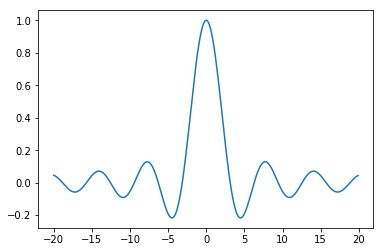

In [27]:
import matplotlib.pyplot as plt
x = np.arange(-20,20,0.1)
y = vsinc(x)
plt.plot(x, y)
plt.show()

我们也可以使用map函数

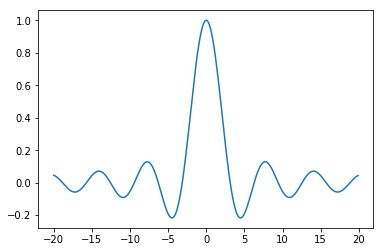

In [30]:
x = np.arange(-20,20,0.1)
y = list(map(sinc, x))
plt.plot(x, y)
plt.show()

## 二元运算

### 四则运算
运算|函数
--- | --- 
`a + b` | `add(a,b)`
`a - b` | `subtract(a,b)`
`a * b` | `multiply(a,b)`
`a / b` | `divide(a,b)`
`a ** b` | `power(a,b)`
`a % b` | `remainder(a,b)`

以乘法为例，数组与标量相乘，相当于数组的每个元素乘以这个标量：

In [31]:
a = np.array([1,2,3])
a*2

array([2, 4, 6])

In [32]:
np.multiply(a, 2)

array([2, 4, 6])

In [34]:
np.multiply(a, 2, a)#将数据储存在a中

array([2, 4, 6])

### 比较和逻辑运算
运算|函数<
--- | --- 
`==` | `equal`|`!=` | `not_equal`
`>` | `greater`|`>=` | `greater_equal`
`<` | `less`|`<=` | `less_equal`
| `logical_and`|| `logical_or`
| `logical_xor`|| `logical_not`
`&` | `bitwise_and`| | `bitwise_or`
`^` | `bitwise_xor`|`~` | `invert`
`>>` | `right_shift`|`<<` | `left_shift`

等于操作也是逐元素比较的：

In [36]:
a = np.array([[1,2,3], [3,4,5]])
b = np.array([[2,3,3], [3,4,6]])
a == b

array([[False, False,  True],
       [ True,  True, False]])

In [38]:
(a==b).all()#如果是true表明a==b

False

In [39]:
np.all(a==b)

False

In [40]:
a = np.array([0,1,2])
b = np.array([1,2,0])
np.logical_and(a, b)#逻辑和运算

array([False,  True, False])

In [41]:
np.logical_or(a, b)#逻辑或运算

array([ True,  True,  True])

In [42]:
np.logical_xor(a, b) #易或

array([ True, False,  True])

### universal function in numpy

**Numpy** 有两种基本对象：`ndarray (N-dimensional array object)` 和 `ufunc (universal function object)`。`ndarray` 是存储单一数据类型的多维数组，而 `ufunc` 则是能够对数组进行处理的函数。

例如，我们之前所接触到的二元操作符对应的 **Numpy** 函数，如 `add`，就是一种 `ufunc` 对象，它可以作用于数组的每个元素。

In [48]:
dir(np.add)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'accumulate',
 'at',
 'identity',
 'nargs',
 'nin',
 'nout',
 'ntypes',
 'outer',
 'reduce',
 'reduceat',
 'signature',
 'types']

### reduce 方法

    op.reduce(a)

将`op`沿着某个轴应用，使得数组 `a` 的维数降低一维。

add 作用到一维数组上相当于求和：

$$
\begin{align}
y & = add.recuce(a) \\
& = a[0] + a[1] + ... + a[N-1] \\
& = \sum_{n=0}^{N-1} a[n]
\end{align}
$$

In [43]:
a = np.arange(10)
np.add.reduce(a)

45

In [45]:
a = np.arange(20).reshape(4, 5)
np.add.reduce(a)# 指定某一个轴, 默认为axis=0

array([30, 34, 38, 42, 46])

In [46]:
np.add.reduce(a, 1)# 指定某一个轴, 默认为axis=0

array([10, 35, 60, 85])

In [47]:
a = np.array(['a', 'b', 'aa', 'fff'], dtype=object)
np.add.reduce(a)

'abaafff'

### accumulate方法

    op.accumulate(a)

`accumulate` 可以看成保存 `reduce` 每一步的结果所形成的数组。

$$
\begin{align}
y & = add.accumulate(a) \\
& = \left[\sum_{n=0}^{0} a[n], \sum_{n=0}^{1} a[n], ..., \sum_{n=0}^{N-1} a[n]\right]
\end{align}
$$

In [49]:
np.add.accumulate(a)

array(['a', 'ab', 'abaa', 'abaafff'], dtype=object)

In [50]:
np.logical_and.accumulate(np.array([1,1,1,1,0,1]))

array([ True,  True,  True,  True, False, False])

### reduceat 方法

    op.reduceat(a, indices)

`reduceat` 方法将操作符运用到指定的下标上，返回一个与 `indices` 大小相同的数组：

$$
\begin{align}
y & = add.reduceat(a, indices) \\
& = \left[\sum_{n=indice[0]}^{indice[1]-1} a[n], \sum_{n=indice[1]}^{indice[2]-1} a[n], ..., \sum_{n=indice[-1]}^{N-1} a[n]\right]
\end{align}
$$

In [51]:
a = np.arange(10)
np.add.reduceat(a, [1,2,3,6,8,9])

array([ 1,  2, 12, 13,  8,  9])

### outer 方法

    op.outer(a, b)

对于 `a` 中每个元素，将 `op` 运用到它和 `b` 的每一个元素上所得到的结果：

In [52]:
a = np.array([1,2,3,4])
b = np.array([1,2,3])
np.add.outer(a, b)

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

In [53]:
np.add.outer(b, a)

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [59]:
a = np.arange(20).reshape(4, 5)
b = np.arange(2)
np.add.outer(a, b)

array([[[ 0,  1],
        [ 1,  2],
        [ 2,  3],
        [ 3,  4],
        [ 4,  5]],

       [[ 5,  6],
        [ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10]],

       [[10, 11],
        [11, 12],
        [12, 13],
        [13, 14],
        [14, 15]],

       [[15, 16],
        [16, 17],
        [17, 18],
        [18, 19],
        [19, 20]]])

## choose 函数实现筛选功能
对于数组，我们有时候需要进行类似 `switch` 和 `case` 进行条件选择，此时使用 choose 函数十分方便：

In [60]:
choice = np.array([[0,1,1],[2,0,1],[1,2,0]])

In [61]:
np.choose(choice, [10,11,12])

array([[10, 11, 11],
       [12, 10, 11],
       [11, 12, 10]])

在上面的例子中，`choose` 将 `0,1,2` 对应的值映射为了 `10, 11, 12`，这里的 `0,1,2` 表示对应的下标。

事实上， `choose` 不仅仅能接受下标参数，还可以接受下标所在的位置：

In [64]:
i0 = np.array([[0,1,2],
               [3,4,5],
               [6,7,8]])
i2 = np.array([[20,21,22],
               [23,24,25],
               [26,27,28]])
control = np.array([[1,0,1],
                    [2,1,0],
                    [1,2,2]])

np.choose(control, [i0, 10, i2]) #这里0对应的是i0, control中的第一行的0也就对应i0相应位置的元素1

array([[10,  1, 10],
       [23, 10,  5],
       [10, 27, 28]])

还可以使用control实现限制数据元素大小的功能

In [66]:
a = np.arange(20).reshape(4, 5)
np.choose(a>4, (4, a)) #将小于4的元素变成4

array([[ 4,  4,  4,  4,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [67]:
a[a<4] = 4#这样写也可以

In [71]:
#限定上下限
a = np.arange(20).reshape(4, 5)
gt = a<4
lt = a>16
ch = gt+2*lt
np.choose(ch, (a, 4, 16))

array([[ 4,  4,  4,  4,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 16, 16, 16]])

In [72]:
a.clip(4, 16) #使用这个也可以

array([[ 4,  4,  4,  4,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 16, 16, 16]])